# Brands  Emotions Judge

## Business Understanding

Each day every firm is producing products and services aiming to impress its customers and the general public as this will automatically lead to more sales which gives better returns. Tech companies are one of the most talked about on social media and therefore lots of information on people reactions to their brands is be available on social media platforms.

A system that can judge the emotions expressed in tweets related to this tech companies would have numerous advantages and potential uses. This can help companies understand public sentiment about their products or services. It would enable the companies gain insights into customer feedback which will help identify areas of improvement or issues that need attention. This would be done by understanding customer preferences and emotions related to different products or features. Then Using this information for product development and innovation.

The system would also give insights of how the companies are doing against their competitors in the eyes of the public. Which will go a long way in assisting marketing strategies. Evaluate the effectiveness of marketing campaigns by analyzing the emotions expressed in tweets before and after a campaign. In addition, it would monitor and assess the emotional reactions of the public during a crisis. This will help companies respond more effectively and make informed decisions.

In some cases, the system would also improve customer support by identify tweets expressing frustration or dissatisfaction with company products and services and responding to the issues addressed by the customer.


## Problem Statement

Social media contain a lot of data availed by members of the public freely. The data contains important information that is in unstructured format which is hard to understand. On the other hand, companies require lots of information to help them make critical decisions about their products and services. This is from the fact that businesses are in constant competition and need to improve each day to keep and grow their market. Our system is looking in to capturing information about people’s emotion on this companies’ products and services. It looks into making the information on social media platform useful and available to companies benefiting both the social media company and our target information uses which are the tech companies.

## Main Objective
To create a sytem that will get public emotions about google and apple products and services from tweets.

## Data Understanding
The data used in this project was sources from Brands and Product Emotions. This data was made by giving tweets to a crowd and they gave feedback on what emotion was expressed on the tweet, either positive, negative or no emotions towards the brand or product. If some emotion was expressed they were also asked to give which brand or product was the target of that emotion. The data was availed in August 30, 2013 by Kent Cavender Bares.

The data comprise of 3 columns and 9094 rows. The rows represent different tweets. The first column (tweet_text) contain text from each of the 9094 tweets. The second column (emotion_in_tweet_is_directed_at) contains the product to which the tweet was directed to. The last column (is_there_an_emotion_directed_at_a_brand_or_product) contains the emotions from the tweet.


In [15]:
# importing the necessary libraries

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import nltk
from   nltk.corpus import stopwords
from   nltk import word_tokenize
from   nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay)
import string
%matplotlib inline

In [2]:
#loading and previewing the dataset
data=pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding='latin-1')
data.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
#viewing data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
#Getting emotion directed to value count
data['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [6]:
#viewing types of emotions and their count
data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [7]:
#changing the names of the columns to shorter names
new_column_names={'is_there_an_emotion_directed_at_a_brand_or_product':'emotion','emotion_in_tweet_is_directed_at':'product'}
data.rename(columns=new_column_names, inplace=True)

The "I can't tell" emotion count seem to be low.It is also simillar to 'No emotion toward brand or product'.We are going to replace it to have 3 catergories of emotion

In [9]:
#replacing "I can't tell" with 'No emotion toward brand or product'
data['emotion'] = data['emotion'].str.replace("I can't tell", 'No emotion toward brand or product')
data.head()

,tweet_text,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [11]:
#label enconding product and emotion column
le = LabelEncoder()
data['productid'] = le.fit_transform(data['product'])
data['target'] = le.fit_transform(data['emotion'])
#droppint the encoded columns
data.drop(['emotion','product'],axis=1,inplace=True)
data.head(5)

,tweet_text,productid,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,8,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,7,2
2,@swonderlin Can not wait for #iPad 2 also. The...,6,2
3,@sxsw I hope this year's festival isn't as cra...,7,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,3,2


In [12]:
#dropping the rows with the missing values on the tweet_text column
data.dropna(subset='tweet_text',inplace=True)

On the next part we are looking to prepare the tweet_text column for Feature Extraction into numerical features using  TF-IDF. We are also going to join it to the product id column as the product the tweet was referring to would have some little effect on what the emotion was. We will start by making a function that takes in text, removes punctions without removing apostrophe in words or remove usernames which start with @.The function will also return all words in their lower case.


In [13]:
nltk.download('punkt')

def tokenize_with_special_cases(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove punctuation except for apostrophes and usernames starting with "@"
    words_cleaned = []
    i = 0
    while i < len(words):
        word = words[i]
        # Keep words with apostrophes
        if "'" in word:
            words_cleaned.append(word)
        # Keep usernames starting with @
        elif word.startswith('@'):
            words_cleaned.append(word)  
        else:
            # Remove punctuation from the word
            word_cleaned = ''.join([char for char in word if char not in string.punctuation])
            # Convert word to lowercase
            if word_cleaned:
                words_cleaned.append(word_cleaned.lower())  
        i += 1
    
    # Join the cleaned words back into a text
    text_cleaned = ' '.join(words_cleaned)
    
    return text_cleaned

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
data['tweet_text'] = data['tweet_text'].apply(tokenize_with_special_cases)
data.head()

,tweet_text,productid,target
0,@ wesley83 i have a 3g iphone after 3 hrs twee...,8,0
1,@ jessedee know about @ fludapp awesome ipadip...,7,2
2,@ swonderlin can not wait for ipad 2 also they...,6,2
3,@ sxsw i hope this year 's festival is n't as ...,7,0
4,@ sxtxstate great stuff on fri sxsw marissa ma...,3,2
...,...,...,...
9088,ipad everywhere sxsw link,6,2
9089,wave buzz rt @ mention we interrupt your regul...,9,1
9090,google 's zeiger a physician never reported po...,9,1
9091,some verizon iphone customers complained their...,9,1


In [17]:
#function for Lemmatization 
def lemmatization_function(text):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(text)


In [19]:
#appling lemmatization on our text
data['tweet_text'] = data['tweet_text'].apply(lemmatization_function)
data

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


,tweet_text,productid,target
0,@ wesley83 i have a 3g iphone after 3 hrs twee...,8,0
1,@ jessedee know about @ fludapp awesome ipadip...,7,2
2,@ swonderlin can not wait for ipad 2 also they...,6,2
3,@ sxsw i hope this year 's festival is n't as ...,7,0
4,@ sxtxstate great stuff on fri sxsw marissa ma...,3,2
...,...,...,...
9088,ipad everywhere sxsw link,6,2
9089,wave buzz rt @ mention we interrupt your regul...,9,1
9090,google 's zeiger a physician never reported po...,9,1
9091,some verizon iphone customers complained their...,9,1


In [21]:
#combining tweet_text with productid to get insight from the product
data['data_x_combines']=data['tweet_text']+data['productid'].astype('str')

In [22]:
#separating data in to train and test 
X = data['data_x_combines']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

## Modelling

In [23]:
# Feature Extraction into numerical features using TF-IDF
stops = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stops)
tf_idf_train =  vectorizer.fit_transform(X_train)
tf_idf_test = vectorizer.transform(X_test)

In [27]:
classifier = RandomForestClassifier(random_state=1)
classifier.fit(tf_idf_train, y_train)
y_preds = classifier.predict(tf_idf_test)
y_train_preds = classifier.predict(tf_idf_train)

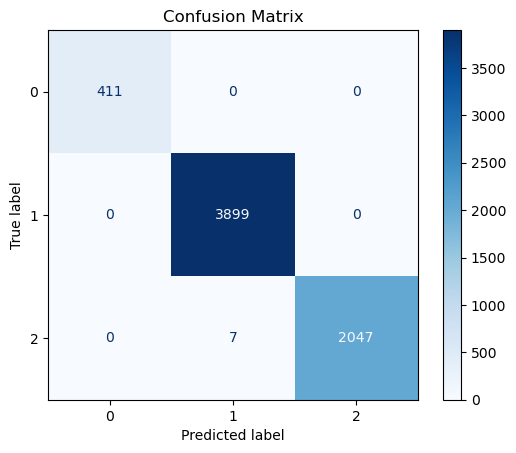

0.9989000628535513


In [36]:
# Compute confusion matrix
conf_matrix_final = confusion_matrix(y_train,y_train_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix_final)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(accuracy_score(y_train,y_train_preds))

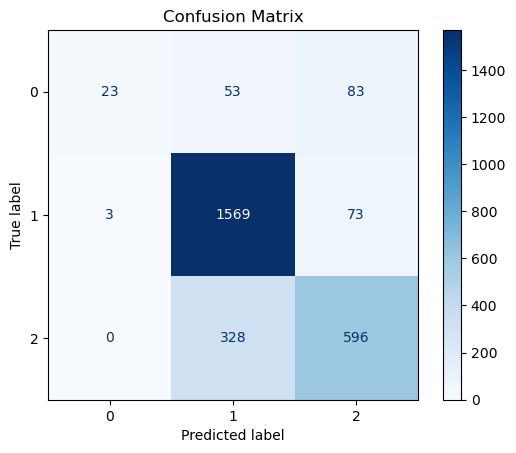

0.8020527859237536


In [37]:
# Compute confusion matrix
conf_matrix_final = confusion_matrix(y_test, y_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix_final)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(accuracy_score(y_test, y_preds))

#### model improvement
From the above analysis the model seems to be performing very well on training data but poorly on test data. This would be an indication of overfitting which leads to poor predicting results.
Our training data seems to have imbalance inputs. We will use oversampling technics to try our model performance on training predictions


In [38]:
#appling Synthetic Minority Over-sampling Technique (SMOTE) on our training set
smote = SMOTE(sampling_strategy='auto', random_state=42) 
X_train_resampled, y_train_resampled = smote.fit_resample(tf_idf_train, y_train)

In [39]:
#retraining our model using data improved by SMOTE
classifier_smote = RandomForestClassifier(class_weight="balanced",random_state=1)
classifier_smote.fit(X_train_resampled,  y_train_resampled)

#predicting our training and test data with the new model
y_train_smote_preds = classifier_smote.predict(tf_idf_train)
y_test_smote_preds = classifier_smote.predict(tf_idf_test)

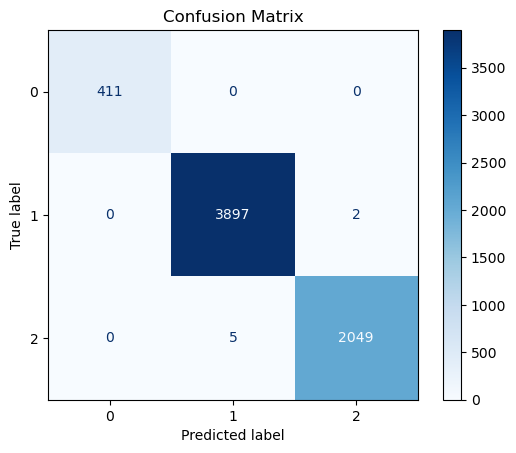

0.9989000628535513


In [40]:
# Compute confusion matrix
conf_matrix_final = confusion_matrix(y_train,y_train_smote_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix_final)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(accuracy_score(y_train,y_train_smote_preds))

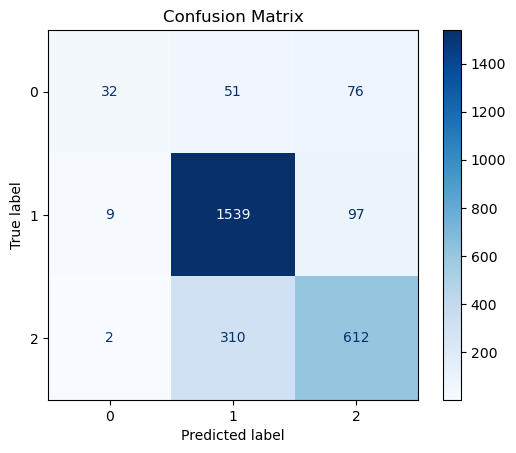

0.8002199413489736


In [41]:
# Compute confusion matrix
conf_matrix_final = confusion_matrix(y_test, y_test_smote_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix_final)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(accuracy_score(y_test, y_test_smote_preds))

In [46]:
#improving our by Hyperparameter Tuning using gridsearch
from sklearn.model_selection import  GridSearchCV# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100,110,120],
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [6,7,8],
    'min_samples_leaf': [1,2],
}
# Initializing GridSearchCV with the RandomForest classifier and hyperparameter grid
grid_search = GridSearchCV(classifier_smote, param_grid, cv=5, scoring='accuracy')

# Fitingt the grid search to your training data
grid_search.fit(X_train_resampled,  y_train_resampled)

# Getting the best parameters from the grid search

grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 120}

In [47]:
y_test_gridpred = grid_search.predict(tf_idf_test)

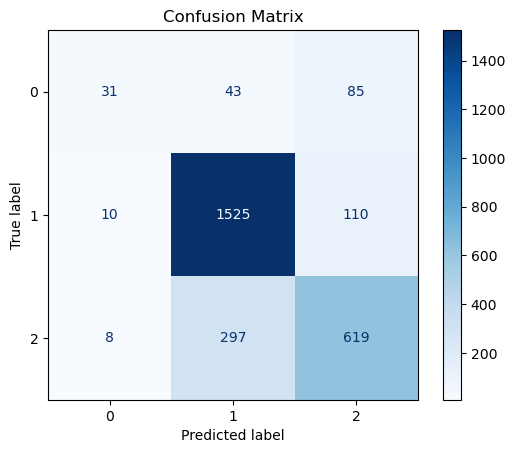

0.7972873900293255


In [48]:
# Compute confusion matrix
conf_matrix_final = confusion_matrix(y_test, y_test_gridpred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix_final)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(accuracy_score(y_test, y_test_gridpred))